In [24]:
import seaborn as sb 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# I wanna open a small car selling store in the USA.
# As I'm starting now and small, I have no time and no money to wast
# I must be precise an efficient so I need a Data Analyst job to 
# Understand the top used cars selled in the USA, the manufactores,
# the car year, kilometers percured and fuel type.
# Then I will be ready to make a business strategic to decide wich models should I have in my store.
# I will use data from the Covid pandemic, because this can tell me wich cars customers are looking for when they don't have too much money to spend.

In [26]:
df=pd.read_csv('vehicles.csv')
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [27]:
# Now lets clean the data frame from not necessary information.
# I will remove region_url,VIN,image_url,description,lat,long,posting_date, id, url, because all those 
# information will not help me to achive my goal that is to know the bestes pontencial cars for sealing.

In [28]:
df.drop(['region_url', 'VIN', 'image_url', 'description', 'lat', 'long', 'posting_date', 'id', 'url'], axis=1, inplace=True)

df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy


In [29]:
#Now I'll search where how many nulls I have in the data frame and clean it
df.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
county          426880
state                0
dtype: int64

In [30]:
# As showed, columns county, paint_color, size, cylinders,conditions and drive don't realy give me any usefull information,
# because there is too many Nulls(NAN)
# Columns year, manufacturer, odometer and type are important so I'll remove just the rows that have NAN values
# using the dropna comand

df.drop(['county','paint_color','size','cylinders', 'condition','drive'], axis=1,inplace=True)
df.dropna(subset=['year', 'manufacturer','odometer','type'], inplace=True)

In [31]:
df

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al
31,auburn,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al
...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy


In [32]:
df.isnull().sum()

region             0
price              0
year               0
manufacturer       0
model           2897
fuel            1682
odometer           0
title_status    6820
transmission    1558
type               0
state              0
dtype: int64

In [33]:
# Now the data frame is clean, so I can start to make general statistics
# using the comand discribe(include='all') to show me the statistics in all the columns.
# I'll use shape() to see the dimensions of my data frame after all those cleaning process.
 
df.describe(include='all')


,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
count,319544,3.195440e+05,319544.000000,319544,316647,317862,3.195440e+05,312724,317986,319544,319544
unique,404,NaN,NaN,42,20482,5,NaN,6,3,13,51
top,jacksonville,NaN,NaN,ford,f-150,gas,NaN,clean,automatic,sedan,ca
freq,2999,NaN,NaN,52202,6283,265514,NaN,303823,243013,83637,38686
mean,NaN,3.977308e+04,2012.200004,NaN,NaN,NaN,9.008764e+04,NaN,NaN,NaN,NaN
std,NaN,7.347842e+06,8.079009,NaN,NaN,NaN,1.636401e+05,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,6.695000e+03,2010.000000,NaN,NaN,NaN,3.460500e+04,NaN,NaN,NaN,NaN
50%,NaN,1.500000e+04,2014.000000,NaN,NaN,NaN,7.984550e+04,NaN,NaN,NaN,NaN
75%,NaN,2.759000e+04,2017.000000,NaN,NaN,NaN,1.272222e+05,NaN,NaN,NaN,NaN


In [34]:
df.size

3514984

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319544 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        319544 non-null  object 
 1   price         319544 non-null  int64  
 2   year          319544 non-null  float64
 3   manufacturer  319544 non-null  object 
 4   model         316647 non-null  object 
 5   fuel          317862 non-null  object 
 6   odometer      319544 non-null  float64
 7   title_status  312724 non-null  object 
 8   transmission  317986 non-null  object 
 9   type          319544 non-null  object 
 10  state         319544 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 29.3+ MB


In [36]:
# falta para acabar o trabalho, fazer e mostrar grouping by dados diferentes(preco group by odometer e fabricante)

# Group by 'price' and 'manufacturer' and calculate mean and median of 'odometer'
grouped_mean = df.groupby(['price', 'manufacturer'])['odometer'].mean().round(2)
grouped_median = df.groupby(['price', 'manufacturer'])['odometer'].median().round(2)

# For 'state', since it is non-numeric, calculating mean and median does not make sense
# I'll use the count of states for each manufacturer and transmission type
grouped_state_counts = df.groupby(['manufacturer', 'transmission'])['state'].count()

# Print results
print("Grouped Mean of Odometer:")
print(grouped_mean)
print("\nGrouped Median of Odometer:")
print(grouped_median)
print("\nGrouped Count of States:")
print(grouped_state_counts)


Grouped Mean of Odometer:
price       manufacturer
0           acura            78847.78
            alfa-romeo       27032.00
            aston-martin     32233.00
            audi             69243.18
            bmw              69811.89
                              ...    
123456789   gmc             320000.00
135008900   nissan          110500.00
1111111111  ford            149000.00
1410065407  jeep            103000.00
3736928711  toyota          164000.00
Name: odometer, Length: 44211, dtype: float64

Grouped Median of Odometer:
price       manufacturer
0           acura            65955.0
            alfa-romeo       27045.0
            aston-martin     34445.0
            audi             65221.0
            bmw              69394.0
                              ...   
123456789   gmc             320000.0
135008900   nissan          110500.0
1111111111  ford            149000.0
1410065407  jeep            103000.0
3736928711  toyota          164000.0
Name: odometer, Length: 

In [37]:
# calcular max e min de informacoes relevantes como o mais caro, o mais vendido o mais popular o mais novo e minimo dos mesmos dados
# continuar.... o manufacturer que vendeu mais e o que vendeu menos, o carro mais velho, o mais novo 
max_price = df['price'].max()
print(f'The biggest price is {max_price}') 
min_price = df['price'].min()
print(f'the smalest price is {min_price}')

The biggest price is 3736928711
the smalest price is 0


In [38]:
#The smalest price can not be 0 because this means that the car was for free
# So lets remove all rows with 0 value in price and then find the minimun price
df = df[df['price'] != 0]
min_price = df['price'].min()
print(f'the smalest price is {min_price}')
# Lets continuing to find max and min of relevent information like the oldest and the newest, the best seller and the worst seller,
# the state that sells more and the worst state to sell.

most_sold_manufacturer = df['manufacturer'].value_counts().idxmax()
most_sold_quantity = df['manufacturer'].value_counts().max()
worst_sold_manufactorer = df['manufacturer'].value_counts().idxmin()
worst_sold_quantity= df['manufacturer'].value_counts().min()
print(f'the most sold manufacturer is { most_sold_manufacturer} with {most_sold_quantity} cars')
print(f'the worst sold manufacturer is {worst_sold_manufactorer} with {worst_sold_quantity} cars')
# Now the youngest and the oldest car.
youngest = df['year'].max()
oldest = df['year'].min()
print(f'The youngest car year is {youngest} , and the oldest is {oldest}')

# Now the state with that have the best sells rate and the worst sell rate.
# Using value_counts() to count what is not numeric like 'state'
best_state = df['state'].value_counts().idxmax()
quantity_of_sells= df['state'].value_counts().max()
worst_state = df['state'].value_counts().idxmin()
worst_quantity = df['state'].value_counts().min()
print(f'The state with the best sells rate is {best_state} with {quantity_of_sells} cars sold and the worst state is {worst_state} with {worst_quantity} cars sold')

the smalest price is 1
the most sold manufacturer is ford with 47603 cars
the worst sold manufacturer is morgan with 1 cars
The youngest car year is 2022.0 , and the oldest is 1900.0
The state with the best sells rate is ca with 34678 cars sold and the worst state is nd with 319 cars sold


In [39]:
# Now I will find the average price of each manufacturer grouped by the state.
# This may help me to see wich state is the best to open my store.

average_price_by_state_manufacturer = df.groupby(['state', 'manufacturer'])['price'].mean()
median_price_by_state_manufacturer = df.groupby(['state', 'manufacturer'])['price'].median()

print(median_price_by_state_manufacturer)
print(average_price_by_state_manufacturer)


state  manufacturer
ak     acura           29995.0
       alfa-romeo      33750.0
       audi            27995.0
       bmw             24995.0
       buick           24500.0
                        ...   
wy     saturn            600.0
       subaru          12000.0
       toyota          16490.0
       volkswagen       6750.0
       volvo           15895.0
Name: price, Length: 1888, dtype: float64
state  manufacturer
ak     acura           32519.315789
       alfa-romeo      33750.000000
       audi            29913.270270
       bmw             26271.666667
       buick           22469.838710
                           ...     
wy     saturn            600.000000
       subaru          15381.818182
       toyota          18043.764706
       volkswagen       7469.250000
       volvo           15895.000000
Name: price, Length: 1888, dtype: float64


In [40]:
# Average and median odometer(km runned) for each model and manufacturer

average_odometer_manufacturer = df.groupby(['manufacturer','model'])['odometer'].mean()
median_odometer_manufacturer = df.groupby(['manufacturer','model'])['odometer'].median()
print(average_odometer_manufacturer)
print(median_odometer_manufacturer)

manufacturer  model                         
acura         2002 rsx type s                    95861.000000
              3.0cl                             236666.666667
              3.2 cl type s                     137888.600000
              3.2 tl                            189043.000000
              3.2 tl - sport                    110000.000000
                                                    ...      
volvo         xc90 t8 inscription 1300 miles      1375.000000
              xc90 v8                           169900.666667
              xc90 v8 awd                       229857.000000
              xc90 v8 awdsuv                    144480.000000
              xc90t6 awd 24733 miles             24733.000000
Name: odometer, Length: 19830, dtype: float64
manufacturer  model                         
acura         2002 rsx type s                    95861.0
              3.0cl                             220000.0
              3.2 cl type s                     136371.0
           

In [41]:
# Show the price grouped by manufacturer and year , with all aggregate functions(average'mean',median, sum and count)
grouped = df.groupby(['manufacturer', 'year']).agg({
    'price': ['mean', 'median', 'sum', 'count']
})

print(grouped)

#Average (Mean):

#Provides an overall view of the central tendency of the data.
#Useful for quick comparisons between datasets.
#Drawback: Sensitive to extreme values or outliers.


#Median:

#Represents the middle value in a sorted dataset.
#Less affected by extreme values, thus more accurate for skewed data.
#Particularly useful in analyzing incomes or housing prices.


#Sum:

#Essential for total calculations, such as total sales or expenses.
#Serves as a basis for other calculations like averages.



#Importance in data analysis:

#They provide a comprehensive picture of the data.
#Allow comparisons between groups or over time.
#Help identify trends and anomalies.
#Serve as a foundation for more advanced analyses.

#Using these measures together provides a deeper understanding of the data and enables data-driven decision-making.

                            price                         
                             mean   median       sum count
manufacturer year                                         
acura        1900.0  38250.000000  38250.0     38250     1
             1988.0    450.000000    450.0       450     1
             1991.0  39133.333333  53900.0    117400     3
             1992.0   3200.000000   3200.0      3200     1
             1993.0   1450.000000   1450.0      2900     2
...                           ...      ...       ...   ...
volvo        2017.0  26056.457746  23590.0   3700017   142
             2018.0  33057.754930  30990.0  11735503   355
             2019.0  36132.185185  36590.0  10731259   297
             2020.0  39715.268817  35990.0   7387040   186
             2021.0  64343.080000  68998.0   1608577    25

[1812 rows x 4 columns]


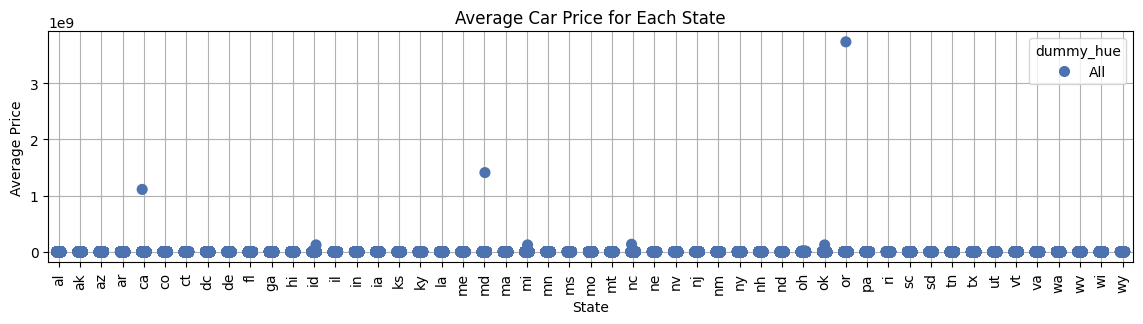

In [42]:
# Ensure df is a copy, not a view
df = df.copy()

plt.figure(figsize=(14, 3))  # Width x Height

# Create the dummy_hue column using .loc
df.loc[:, 'dummy_hue'] = 'All'

# Create the dot plot
sb.stripplot(x='state', y='price', data=df, jitter=True, palette='deep', size=8, hue='dummy_hue')

# Add title and labels
plt.title('Average Car Price for Each State')
plt.xlabel('State')
plt.ylabel('Average Price')

# Show the plot
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


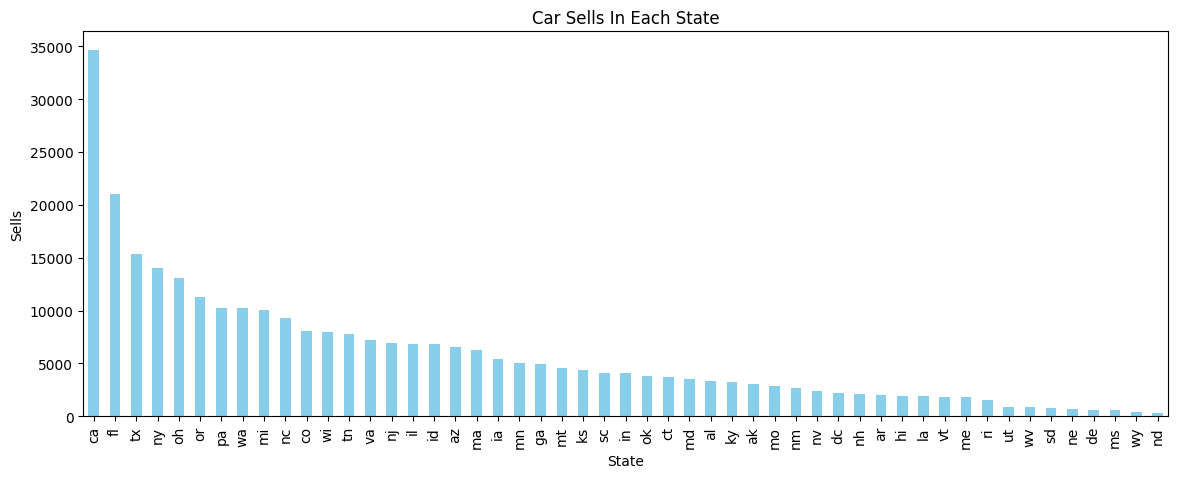

In [43]:
df = pd.DataFrame(df)

#Counting sells per state
cars_sells_in_each_state = df['state'].value_counts()

# Barchart criation and configuration
plt.figure(figsize=(14, 5))
cars_sells_in_each_state.plot(kind='bar', color='skyblue')
plt.title('Car Sells In Each State')
plt.xlabel('State')
plt.ylabel('Sells')
plt.show()


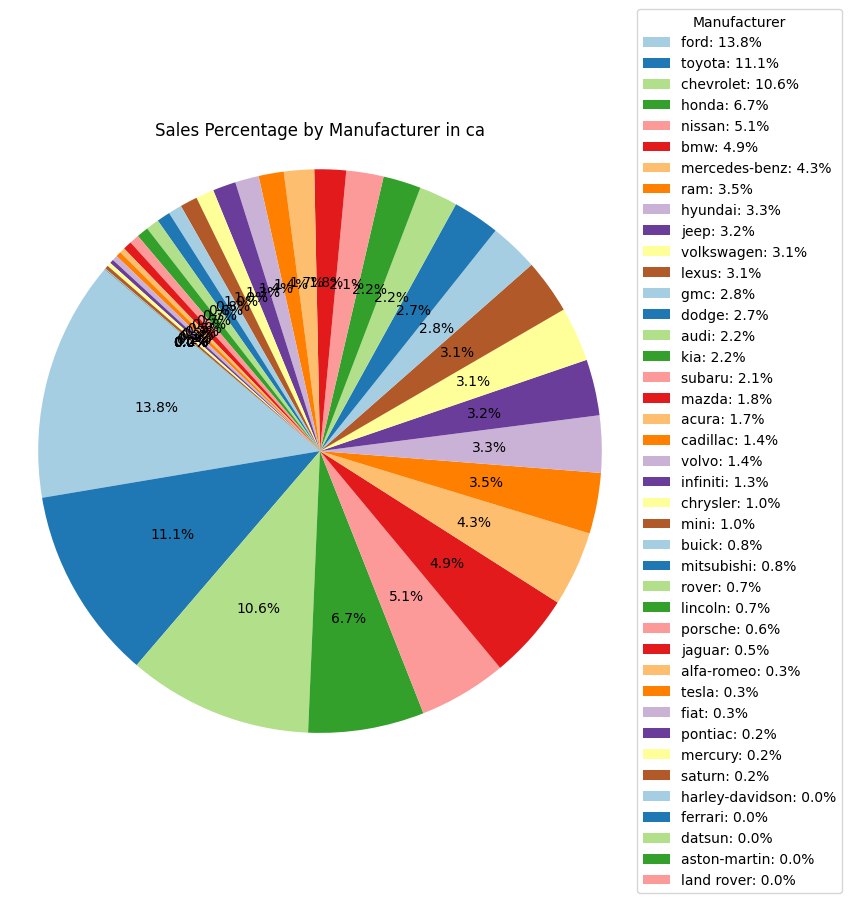

In [44]:
# I'll chouse 'ca'(California), as my specific state to analyse because according
# to the last two graphics, California is the best state. It has the best seller rate of all USA
# and a good average sell price.
specific_state = 'ca'

# Filter the data by the specific state
df = df[df['state'] == specific_state]

# Sales count by manufacturer using value_counts()
sales_count = df['manufacturer'].value_counts()

# Calculate the percentage
sales_percentage = (sales_count / sales_count.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sales_percentage, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Customize the legend with percentages.
# To make the graph more conftable to read, I will also write the percentage in the legend.
legend_labels = [f'{manufacturer}: {percentage:.1f}%' for manufacturer, percentage in zip(sales_percentage.index, sales_percentage)]
plt.legend(wedges, legend_labels, title="Manufacturer", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title(f'Sales Percentage by Manufacturer in {specific_state}')
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.show()



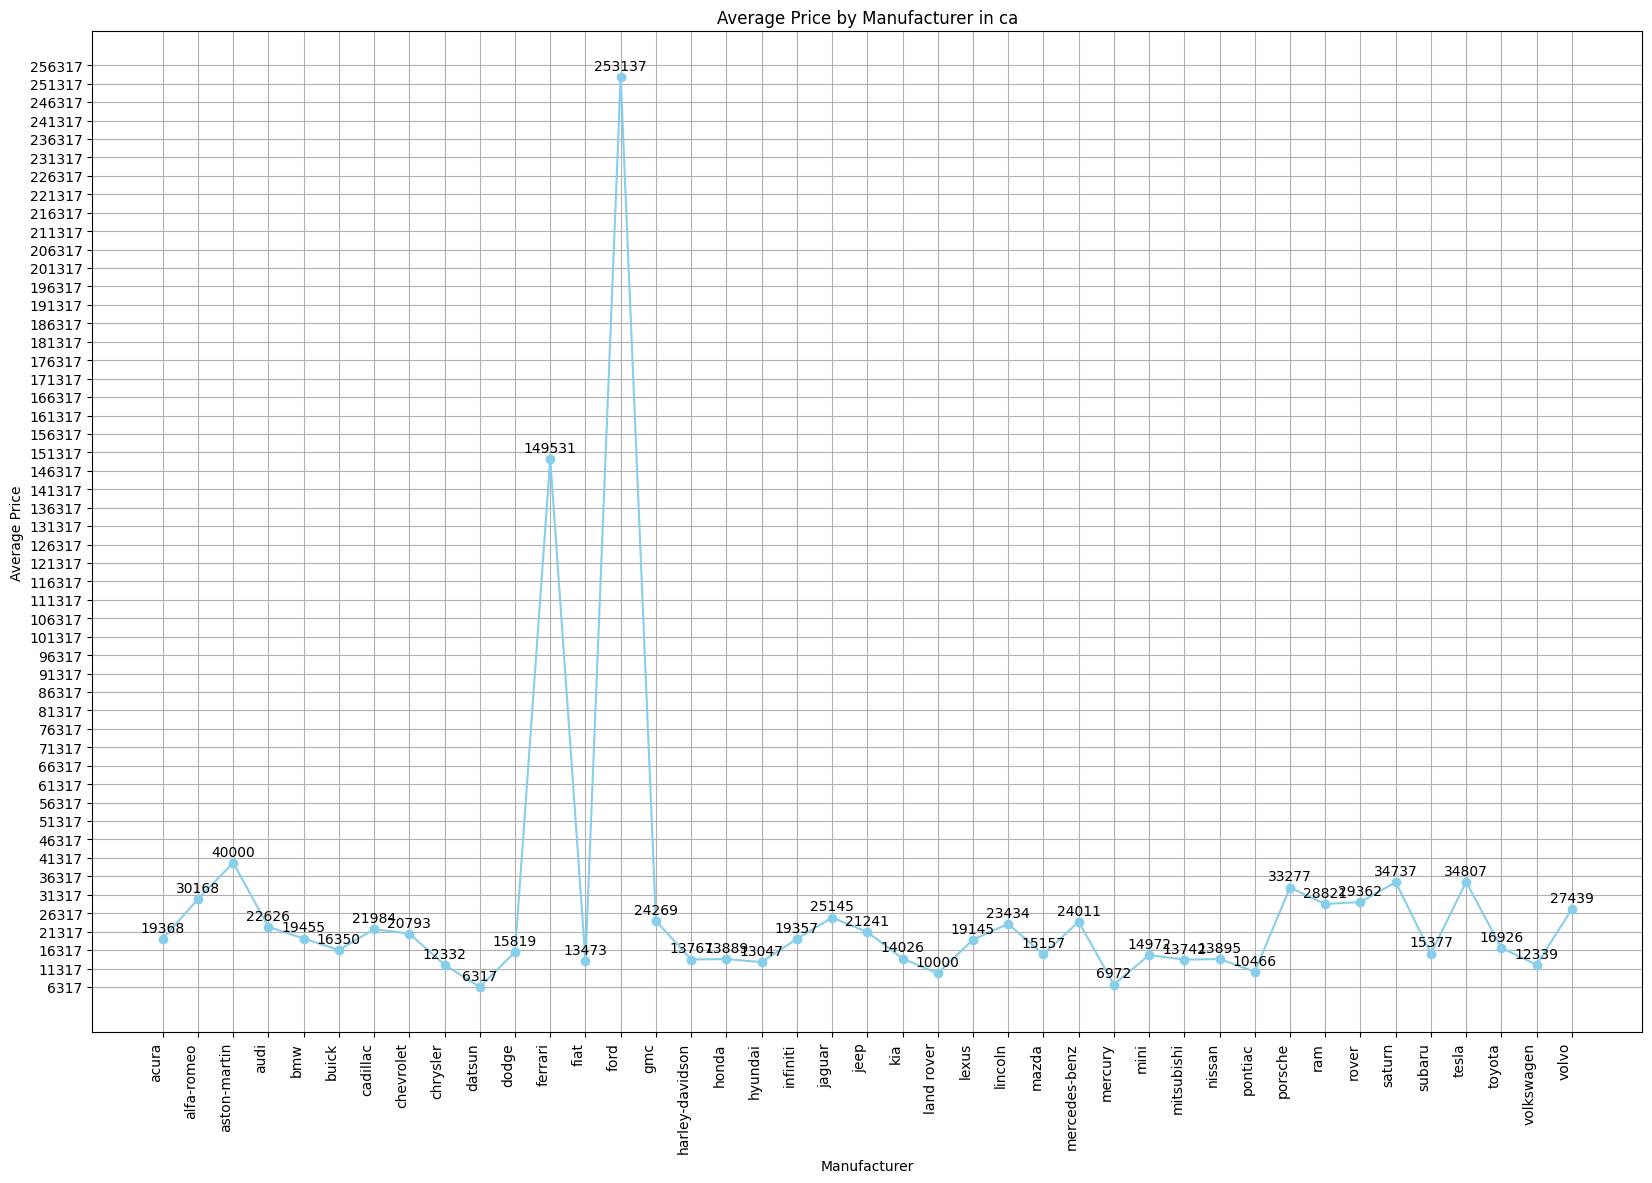

In [45]:
# According to the last graph, ford,toyota,chevrolet,honda and nissan are the best 
# brands to have in my store, since ford(13.8%),toyota(11.1%) and chevrolet(10.6)
# are best sellers with close sell percentage. The same for honda and nissan the secound best sellers

# Will a graph for average price for all brands in California.
# meaby there is a brand that is more profitable in price.

# Create the line graph
plt.figure(figsize=(20, 13))
ax = plt.gca()
avg_price_by_manufacturer = df.groupby('manufacturer')['price'].mean()
avg_price_by_manufacturer.sort_index().plot(kind='line', marker='o', color='skyblue', ax=ax)

# Customize the grid
ax.grid(True)
ax.set_xticks(range(len(avg_price_by_manufacturer.index)))
ax.set_xticklabels(avg_price_by_manufacturer.index, rotation=90, ha='right')
ax.set_yticks(range(int(avg_price_by_manufacturer.min()), int(avg_price_by_manufacturer.max()) + 5000, 5000))

# Add annotations
for i, (manufacturer, price) in enumerate(avg_price_by_manufacturer.items()):
    ax.annotate(f'{price:.0f}', 
                (i, price),
                textcoords="offset points",
                xytext=(0, 5),  # Vertical offset
                ha='center')

plt.title(f'Average Price by Manufacturer in {specific_state}')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.show()

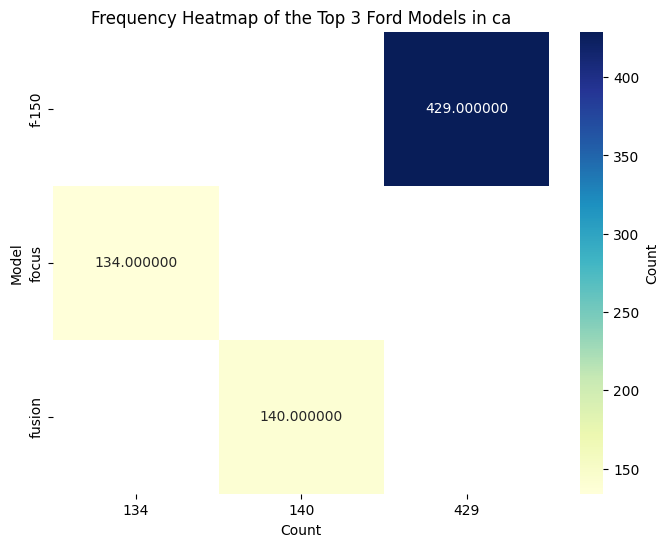

In [46]:
# Ford,toyota,chevrolet,honda and nissan still the best choice amount all the others branches to have in my store


#Now that I've decided wich branches will be in my store, I need to know wich models are the best sellers.
# Starting with ford, top 3 models because I'm a small business, with a heathmap where the color tells the frequence of an event. in this case sells
# Sample DataFrame (replace with your actual data)
df = pd.DataFrame(df)


# Choose the specific state and manufacturer
specific_state = 'ca'
manufacturer = 'ford'

# Filter the data by the specific state and manufacturer
df_filtered = df[(df['state'] == specific_state) & (df['manufacturer'] == manufacturer)]

# Identify the top 3 models by frequency
top_models = df_filtered['model'].value_counts().nlargest(3).index

# Filter the data to include only the top 3 models
df_top_models = df_filtered[df_filtered['model'].isin(top_models)]

# Count the occurrences of each model
model_counts = df_top_models['model'].value_counts().reindex(top_models)

# Prepare data for heatmap
heatmap_data = pd.DataFrame({
    'Model': model_counts.index,
    'Count': model_counts.values
}).pivot(index='Model', columns='Count', values='Count')

# Create the heatmap
plt.figure(figsize=(8, 6))  # Width x Height
sb.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='0f', cbar_kws={'label': 'Count'})

# Add title and labels
plt.title(f'Frequency Heatmap of the Top 3 Ford Models in {specific_state}')
plt.xlabel('Count')
plt.ylabel('Model')

# Show the plot
plt.show()

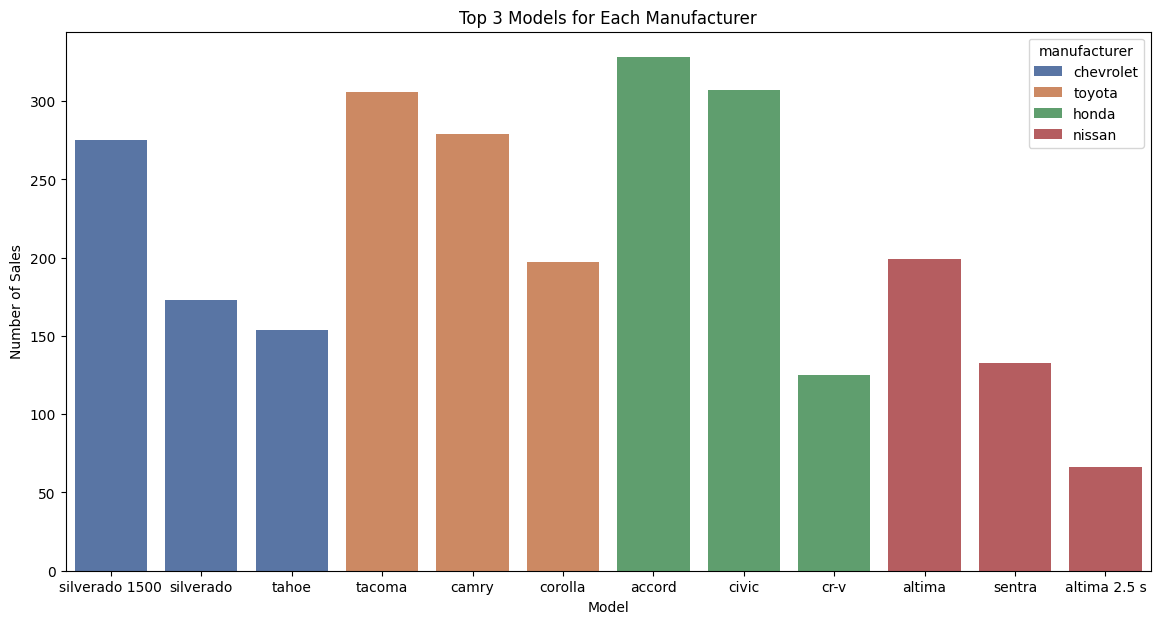

In [47]:
# Now I'll do the same with chevrolet,toyota,honda and nissan in barplot.



# Sample DataFrame (replace with your actual data)
df = pd.DataFrame(df)

# Define the manufacturers of interest
manufacturers = ['chevrolet', 'toyota', 'honda', 'nissan', 'BMW']

# Prepare an empty list to collect data
top_models_list = []

# Iterate through each manufacturer and find the top 3 models
for manufacturer in manufacturers:
    top_models = (df[df['manufacturer'] == manufacturer]['model']
                  .value_counts()
                  .nlargest(3)  # Automatically find the top 3 models
                  .reset_index(name='count'))
    top_models.rename(columns={'index': 'model'}, inplace=True)
    top_models['manufacturer'] = manufacturer
    top_models_list.append(top_models)

# Combine the results into a single DataFrame
top_models_df = pd.concat(top_models_list)

# Create the bar plot
plt.figure(figsize=(14, 7))
sb.barplot(data=top_models_df, x='model', y='count', hue='manufacturer', palette='deep')

# Add title and labels
plt.title('Top 3 Models for Each Manufacturer')
plt.xlabel('Model')
plt.ylabel('Number of Sales')
plt.show()




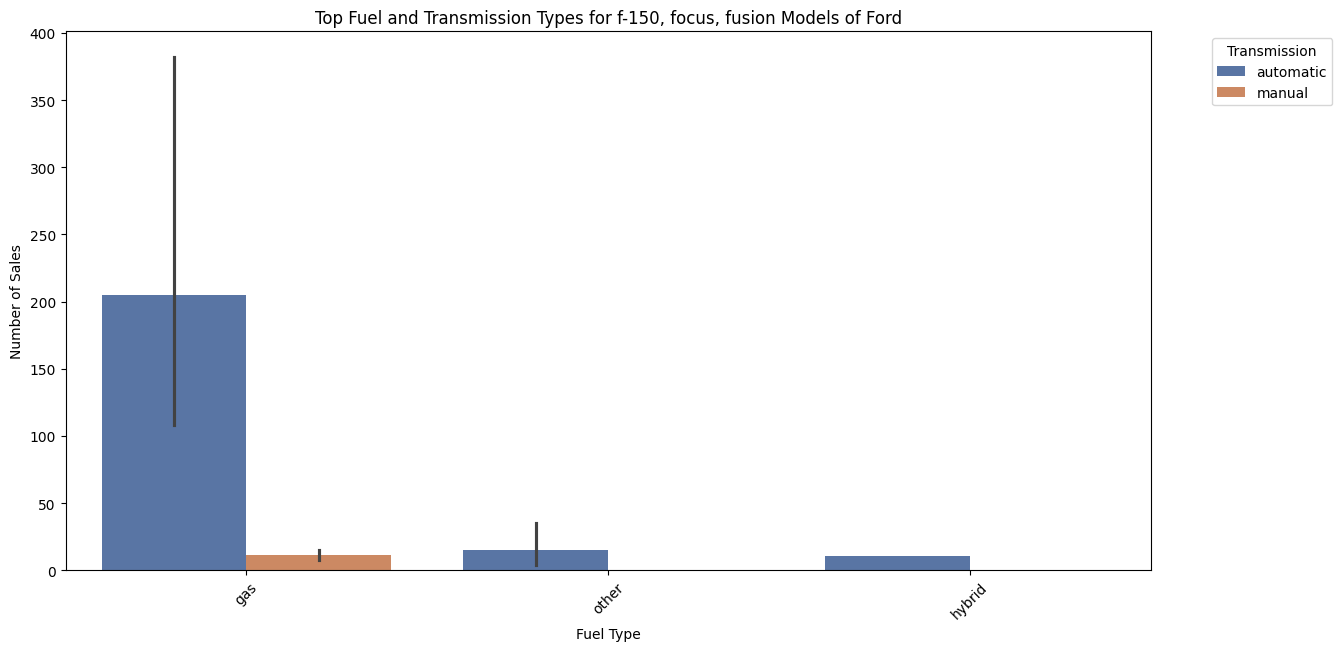

In [48]:
# Now I wanna find for all those models and manufactorers analised, wich fuel and gear transmission are the
# best sellers


# Sample DataFrame (replace with your actual data)
df = pd.DataFrame(df)

# Define the manufacturer and specific models
manufacturer = 'ford'
models_of_interest = ['f-150', 'focus', 'fusion']

# Filter the DataFrame for the specific manufacturer and models
df_filtered = df[(df['manufacturer'] == manufacturer) & (df['model'].isin(models_of_interest))]

# Group by model, fuel, and transmission to get the count of each combination
fuel_transmission_counts = (df_filtered
                            .groupby(['model', 'fuel', 'transmission'])
                            .size()
                            .reset_index(name='count'))

# Get the top fuel and transmission types for each model
top_fuel_transmission_counts = (fuel_transmission_counts
                                .sort_values(by=['model', 'count'], ascending=[True, False])
                                .groupby('model')
                                .head(3))  # Get top 3 fuel-transmission combinations for each model

# Create the bar plot
plt.figure(figsize=(14, 7))
sb.barplot(data=top_fuel_transmission_counts, x='fuel', y='count', hue='transmission', palette='deep')

# Add title and labels
plt.title(f'Top Fuel and Transmission Types for {", ".join(models_of_interest)} Models of {manufacturer.title()}')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Sales')

# Add a legend for transmission types
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles, labels, title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()






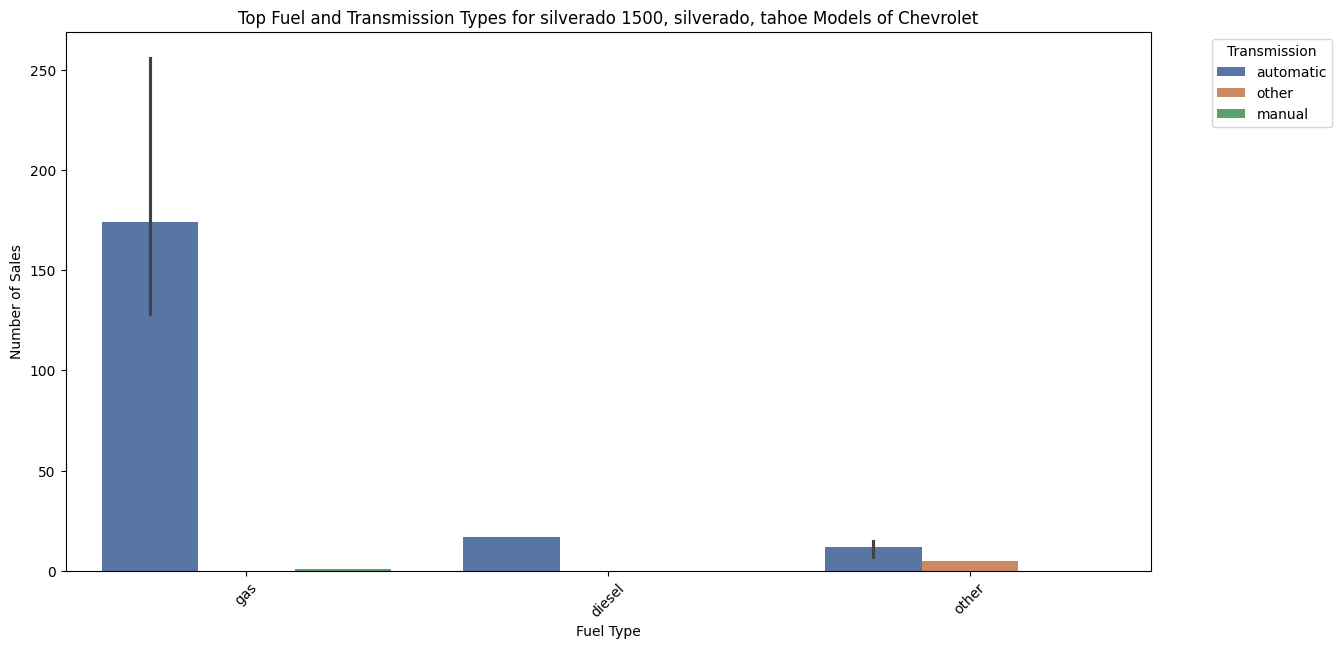

In [49]:
# Sample DataFrame (replace with your actual data)
df = pd.DataFrame(df)

# Define the manufacturer and specific models
manufacturer = 'chevrolet'
models_of_interest = ['silverado 1500', 'silverado', 'tahoe']

# Filter the DataFrame for the specific manufacturer and models
df_filtered = df[(df['manufacturer'] == manufacturer) & (df['model'].isin(models_of_interest))]

# Group by model, fuel, and transmission to get the count of each combination
fuel_transmission_counts = (df_filtered
                            .groupby(['model', 'fuel', 'transmission'])
                            .size()
                            .reset_index(name='count'))

# Get the top fuel and transmission types for each model
top_fuel_transmission_counts = (fuel_transmission_counts
                                .sort_values(by=['model', 'count'], ascending=[True, False])
                                .groupby('model')
                                .head(3))  # Get top 3 fuel-transmission combinations for each model

# Create the bar plot
plt.figure(figsize=(14, 7))
sb.barplot(data=top_fuel_transmission_counts, x='fuel', y='count', hue='transmission', palette='deep')

# Add title and labels
plt.title(f'Top Fuel and Transmission Types for {", ".join(models_of_interest)} Models of {manufacturer.title()}')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Sales')

# Add a legend for transmission types
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles, labels, title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()

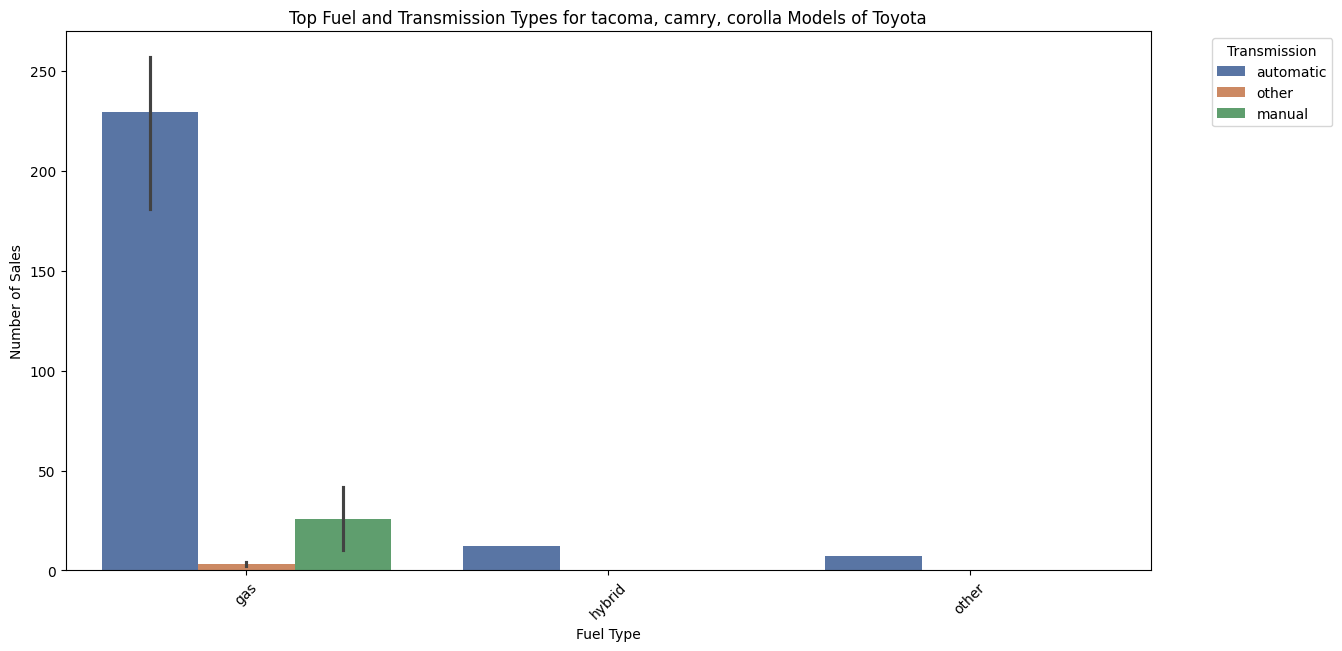

In [50]:

# Sample DataFrame (replace with your actual data)
df = pd.DataFrame(df)

# Define the manufacturer and specific models
manufacturer = 'toyota'
models_of_interest = ['tacoma', 'camry', 'corolla']

# Filter the DataFrame for the specific manufacturer and models
df_filtered = df[(df['manufacturer'] == manufacturer) & (df['model'].isin(models_of_interest))]

# Group by model, fuel, and transmission to get the count of each combination
fuel_transmission_counts = (df_filtered
                            .groupby(['model', 'fuel', 'transmission'])
                            .size()
                            .reset_index(name='count'))

# Get the top fuel and transmission types for each model
top_fuel_transmission_counts = (fuel_transmission_counts
                                .sort_values(by=['model', 'count'], ascending=[True, False])
                                .groupby('model')
                                .head(3))  # Get top 3 fuel-transmission combinations for each model

# Create the bar plot
plt.figure(figsize=(14, 7))
sb.barplot(data=top_fuel_transmission_counts, x='fuel', y='count', hue='transmission', palette='deep')

# Add title and labels
plt.title(f'Top Fuel and Transmission Types for {", ".join(models_of_interest)} Models of {manufacturer.title()}')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Sales')

# Add a legend for transmission types
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles, labels, title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()


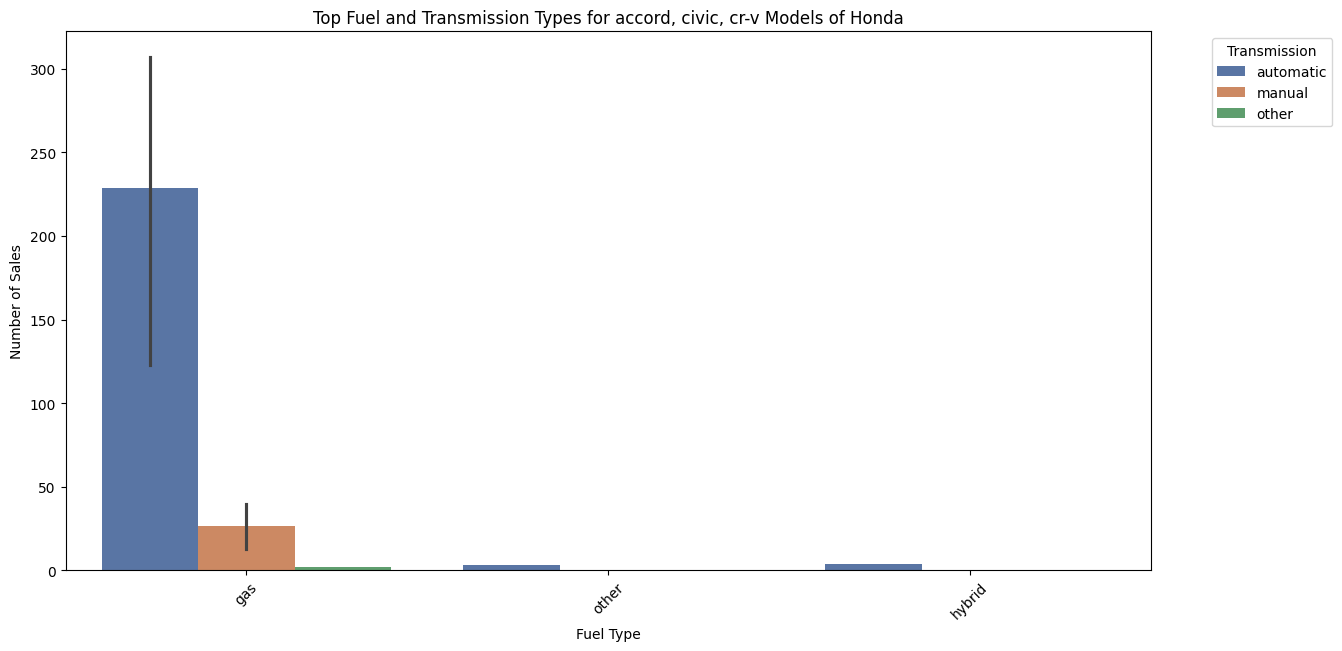

In [51]:
# Sample DataFrame (replace with your actual data)
df = pd.DataFrame(df)

# Define the manufacturer and specific models
manufacturer = 'honda'
models_of_interest = ['accord', 'civic', 'cr-v']

# Filter the DataFrame for the specific manufacturer and models
df_filtered = df[(df['manufacturer'] == manufacturer) & (df['model'].isin(models_of_interest))]

# Group by model, fuel, and transmission to get the count of each combination
fuel_transmission_counts = (df_filtered
                            .groupby(['model', 'fuel', 'transmission'])
                            .size()
                            .reset_index(name='count'))

# Get the top fuel and transmission types for each model
top_fuel_transmission_counts = (fuel_transmission_counts
                                .sort_values(by=['model', 'count'], ascending=[True, False])
                                .groupby('model')
                                .head(3))  # Get top 3 fuel-transmission combinations for each model

# Create the bar plot
plt.figure(figsize=(14, 7))
sb.barplot(data=top_fuel_transmission_counts, x='fuel', y='count', hue='transmission', palette='deep')

# Add title and labels
plt.title(f'Top Fuel and Transmission Types for {", ".join(models_of_interest)} Models of {manufacturer.title()}')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Sales')

# Add a legend for transmission types
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles, labels, title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()

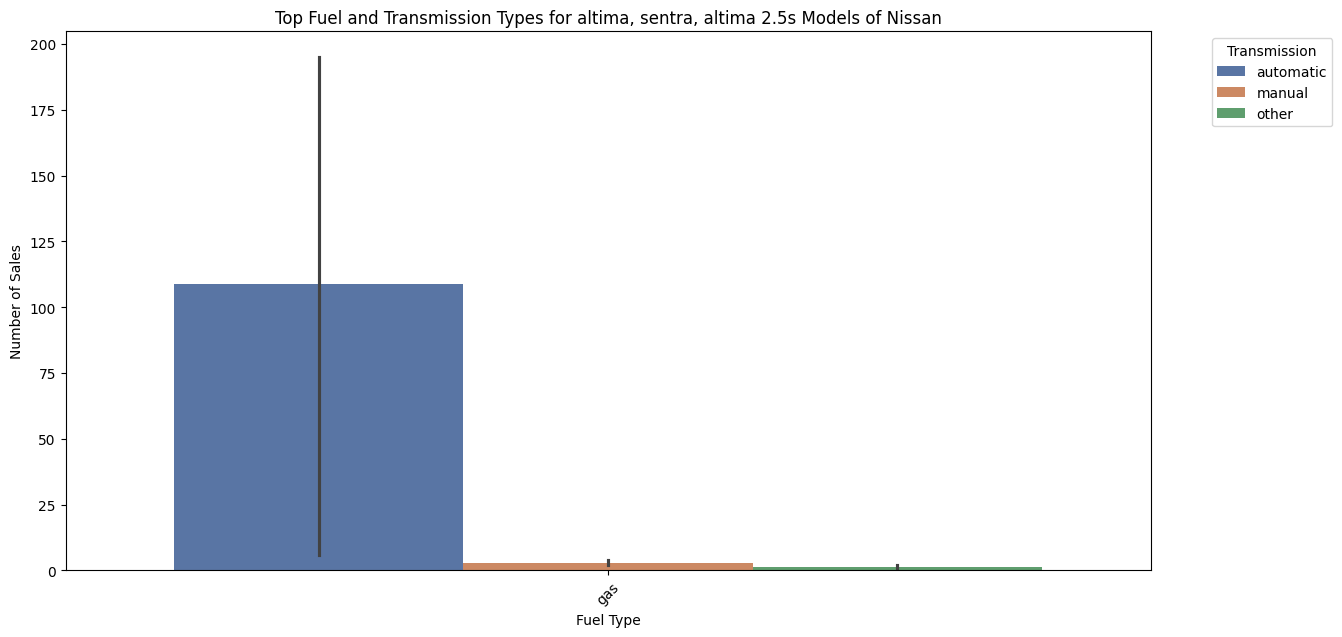

In [52]:
# Sample DataFrame (replace with your actual data)
df = pd.DataFrame(df)

# Define the manufacturer and specific models
manufacturer = 'nissan'
models_of_interest = ['altima', 'sentra', 'altima 2.5s']

# Filter the DataFrame for the specific manufacturer and models
df_filtered = df[(df['manufacturer'] == manufacturer) & (df['model'].isin(models_of_interest))]

# Group by model, fuel, and transmission to get the count of each combination
fuel_transmission_counts = (df_filtered
                            .groupby(['model', 'fuel', 'transmission'])
                            .size()
                            .reset_index(name='count'))

# Get the top fuel and transmission types for each model
top_fuel_transmission_counts = (fuel_transmission_counts
                                .sort_values(by=['model', 'count'], ascending=[True, False])
                                .groupby('model')
                                .head(3))  # Get top 3 fuel-transmission combinations for each model

# Create the bar plot
plt.figure(figsize=(14, 7))
sb.barplot(data=top_fuel_transmission_counts, x='fuel', y='count', hue='transmission', palette='deep')

# Add title and labels
plt.title(f'Top Fuel and Transmission Types for {", ".join(models_of_interest)} Models of {manufacturer.title()}')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Sales')

# Add a legend for transmission types
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles, labels, title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()

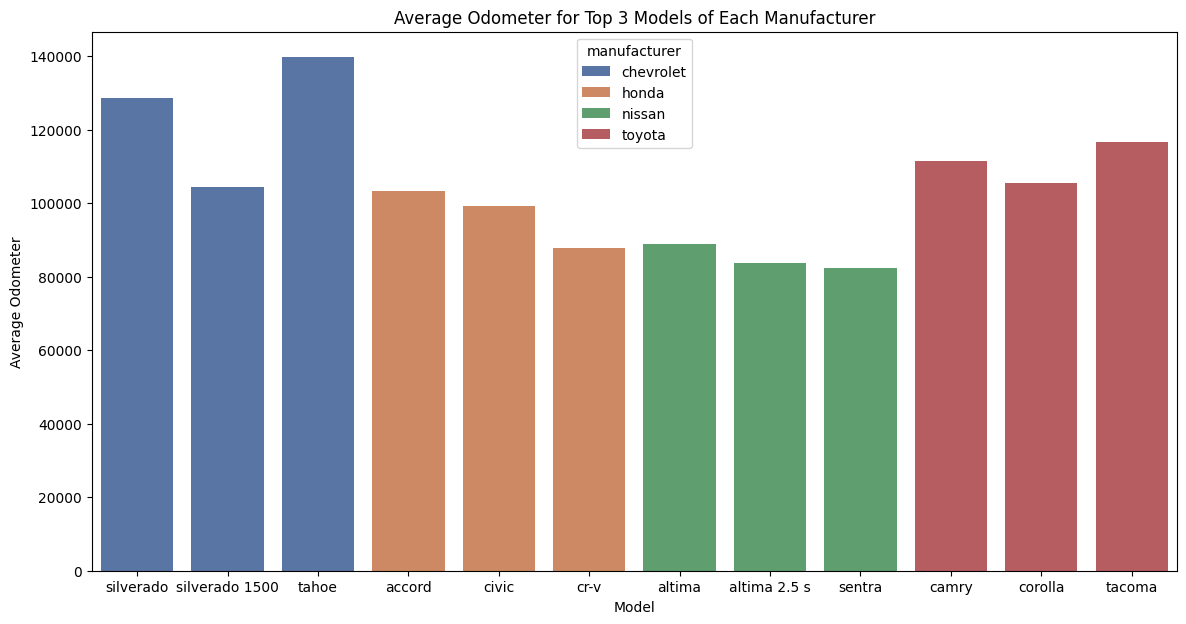

In [53]:
# Sample DataFrame (replace with your actual data)
df = pd.DataFrame(df)

# Define the manufacturers of interest
manufacturers = ['chevrolet', 'toyota', 'honda', 'nissan']

# Prepare an empty list to collect data
top_models_list = []

# Iterate through each manufacturer and find the top 3 models
for manufacturer in manufacturers:
    top_models = (df[df['manufacturer'] == manufacturer]['model']
                  .value_counts()
                  .nlargest(3)  # Automatically find the top 3 models
                  .reset_index(name='count'))
    top_models.rename(columns={'index': 'model'}, inplace=True)
    top_models['manufacturer'] = manufacturer
    top_models_list.append(top_models)

# Combine the results into a single DataFrame
top_models_df = pd.concat(top_models_list)

# Merge with original DataFrame to get odometer information
top_models_df = top_models_df.merge(df[['manufacturer', 'model', 'odometer']], 
                                     on=['manufacturer', 'model'])

# Calculate the average odometer for the top models
average_odometer = (top_models_df
                    .groupby(['manufacturer', 'model'])
                    .agg({'odometer': 'mean'})
                    .reset_index()
                    .rename(columns={'odometer': 'average_odometer'}))

# Create the bar plot
plt.figure(figsize=(14, 7))
sb.barplot(data=average_odometer, x='model', y='average_odometer', hue='manufacturer', palette='deep')

# Add title and labels
plt.title('Average Odometer for Top 3 Models of Each Manufacturer')
plt.xlabel('Model')
plt.ylabel('Average Odometer')
plt.show()


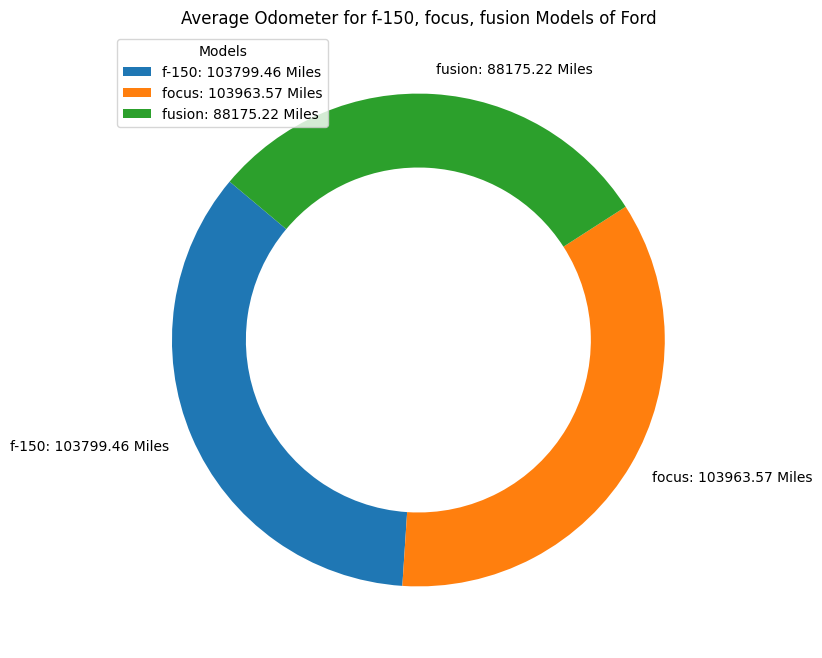

In [54]:
# Sample DataFrame (replace with your actual data)
df = pd.DataFrame(df)

# Define the manufacturer and specific models
manufacturer = 'ford'
models_of_interest = ['f-150', 'focus', 'fusion']

# Filter the DataFrame for the specific manufacturer and models
df_filtered = df[(df['manufacturer'] == manufacturer) & (df['model'].isin(models_of_interest))]

# Calculate the average odometer for each model
average_odometer = (df_filtered
                    .groupby('model')['odometer']
                    .mean()
                    .reset_index(name='average_odometer'))

# Define labels with average odometer values
labels = [f'{model}: {avg:.2f} Miles' for model, avg in zip(average_odometer['model'], average_odometer['average_odometer'])]

# Plot the pie chart
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(average_odometer['average_odometer'], 
                        labels=labels, 
                        startangle=140, 
                        colors=plt.get_cmap('tab10').colors, 
                        wedgeprops=dict(width=0.3))  # Adjust the wedge width to make it a donut chart if preferred

# Add title
plt.title(f'Average Odometer for {", ".join(models_of_interest)} Models of {manufacturer.title()}')

# Create a legend with average odometer values
plt.legend(wedges, labels, title="Models", loc="best")

# Show the pie chart
plt.show()




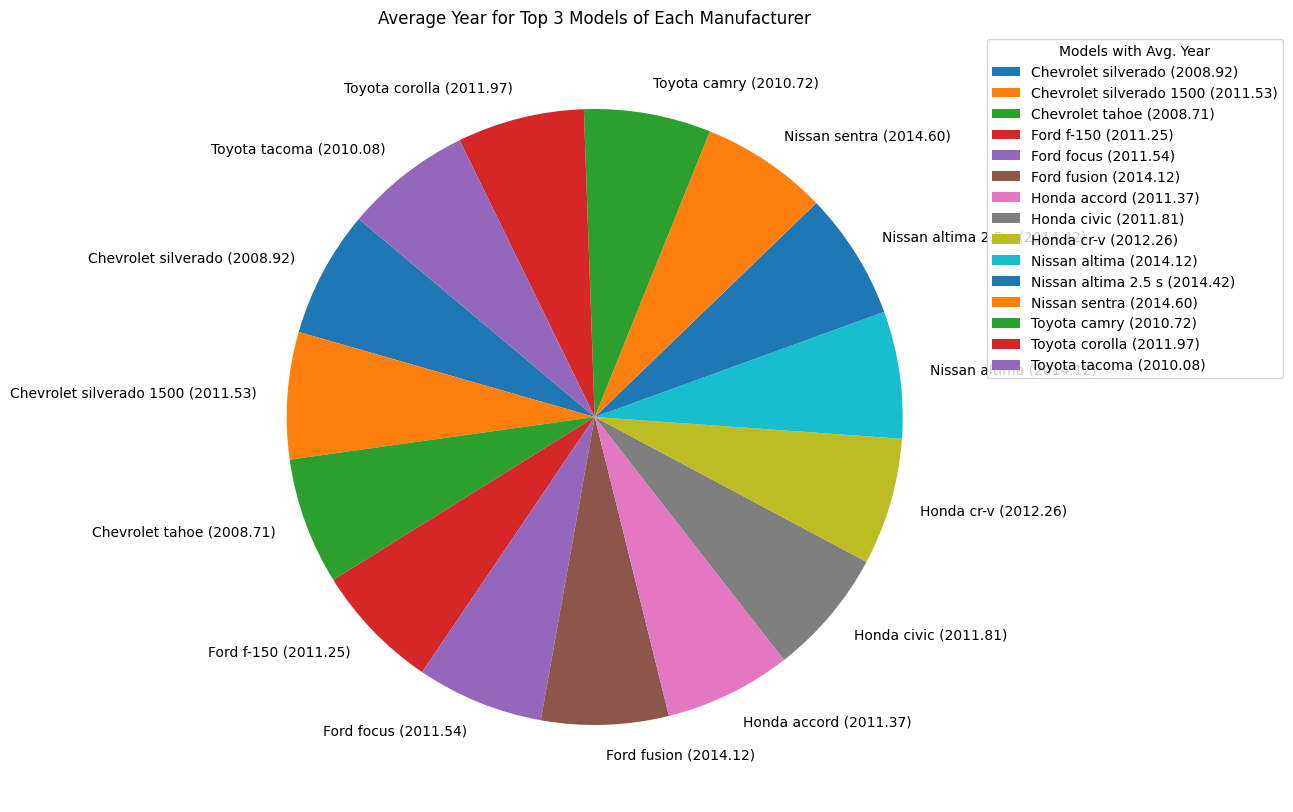

In [55]:
# Last graph to descover the average year of each model that must be in my store.

# Sample DataFrame (replace with your actual data)
df = pd.DataFrame(df)

# Define the manufacturers of interest
manufacturers = ['chevrolet', 'toyota', 'honda', 'nissan', 'ford']

# Prepare an empty list to collect data
top_models_list = []

# Iterate through each manufacturer and find the top 3 models
for manufacturer in manufacturers:
    top_models = (df[df['manufacturer'] == manufacturer]['model']
                  .value_counts()
                  .nlargest(3)  # Automatically find the top 3 models
                  .reset_index(name='count'))
    top_models.rename(columns={'index': 'model'}, inplace=True)
    top_models['manufacturer'] = manufacturer
    top_models_list.append(top_models)

# Combine the results into a single DataFrame
top_models_df = pd.concat(top_models_list)

# Merge with original DataFrame to get odometer information
top_models_df = top_models_df.merge(df[['manufacturer', 'model', 'year']], 
                                     on=['manufacturer', 'model'])

# Calculate the average odometer for the top models
average_odometer = (top_models_df
                    .groupby(['manufacturer', 'model'])
                    .agg({'year': 'mean'})
                    .reset_index()
                    .rename(columns={'year': 'average_year'}))

# Generate labels for the pie chart
labels = [f"{row['manufacturer'].title()} {row['model']} ({row['average_year']:.2f})" for index, row in average_odometer.iterrows()]

# Plot the pie chart
plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(average_odometer['average_year'], labels=labels, startangle=140, colors=plt.get_cmap('tab10').colors)

# Add title
plt.title('Average Year for Top 3 Models of Each Manufacturer')

# Add the legend with the corresponding average year
plt.legend(wedges, labels, title="Models with Avg. Year", bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


In [56]:
#Conclusion: After analyzing the vehicles.csv database with the goal of determining where
#and which cars I should have in my store, I concluded that the store should be located 
#in the state of California ('ca') according to graphs 1 and 2, as it has the highest 
#number of sales and the average price of a car there is higher than in almost all other
#states (3th highest). Having decided where to open my store, I saw through the pie chart 
#which manufacturers sell the most in California and concluded that Ford, Chevrolet, Toyota,
#Honda, and Nissan are the best options because, in addition to selling more, they have a
#good average price (graph 2). Now, I created a heatmap graph to find out which are the 3
#best-selling Ford models, only 3 because I'm a small business owner, and discovered they are
#F-150, Focus, and Fusion. I did the same with the others mentioned manufacturers and found their models.
#Then I created more graphs, one for each manufacturer, showing the fuel type of the best-selling cars,
#and the answer is clearly gasoline. I couldn't forget the obvious, so I created graphs to know the odometer
#reading (miles driven) of each of these models and noticed that between 80,000 and 100,000 is ideal.
# My last graph shows me the average year of each model. They should be between years 2010 and 2014.
#Therefore, if I want to open a store, it should be located in California and sell Ford (F-150, Focus, and Fusion),
#Chevrolet (Silverado, Silverado 1500, and Tahoe), Toyota (Tacoma, Camry, and Corolla), Honda 
#(Accord, Civic, and CR-V), and Nissan (Altima, Sentra, and Altima 2.5S) cars, all powered by 
#gasoline with mileage between 80,000 and 100,000 miles years between 2010 and 2014.